In [74]:
import random
import os


# Function to generate a random graph
def generate_data(NODES_NUMBER):
    data = []
    used_coordinates = set()

    while len(data) < NODES_NUMBER:
        x = random.randint(0, 50)
        y = random.randint(0, 50)
        if (x, y) not in used_coordinates:
            used_coordinates.add((x, y))
            data.append((len(data) + 1, x, y))

    return data


# Function to write the generated data to a file
def write_to_file(filename, data):
    with open(filename, "w") as f:
        for entry in data:
            f.write(f"{entry[0]} {entry[1]} {entry[2]}\n")


NODES_NUMBER = 10
data = generate_data(NODES_NUMBER)


filename = "TSP.txt"
if os.path.exists(filename):
    os.remove(filename)

write_to_file(filename, data)

print(f"Data generated and written to {filename}")

Data generated and written to TSP.txt


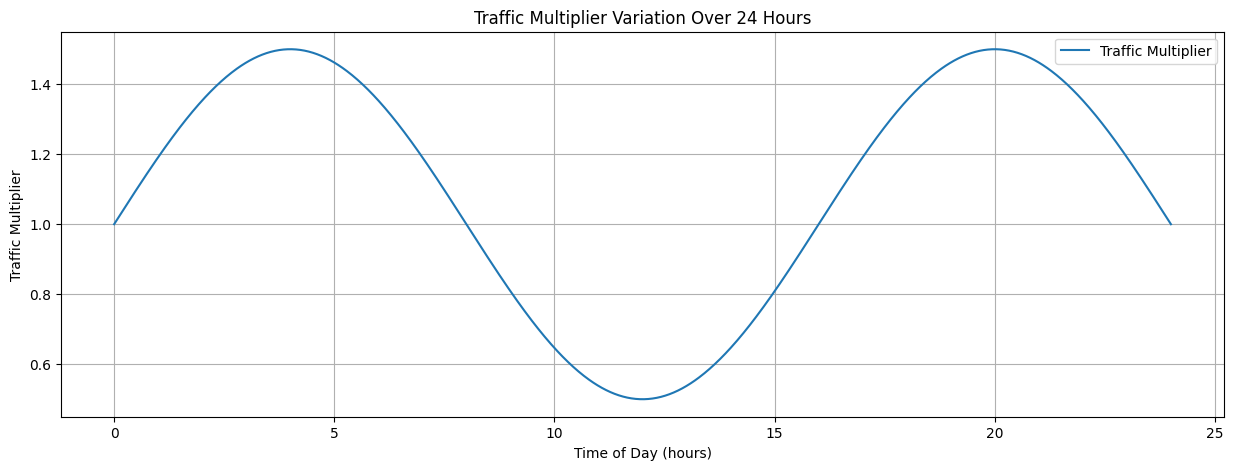

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the sine function representing traffic variations
hours = np.linspace(0, 24, 1000)
TRAFFIC_FUNCTION = 1 + 0.5 * np.sin(hours / 24 * 3 * np.pi)

# Plot the sine function
plt.figure(figsize=(15, 5))
plt.plot(hours, TRAFFIC_FUNCTION, label="Traffic Multiplier")
plt.xlabel("Time of Day (hours)")
plt.ylabel("Traffic Multiplier")
plt.title("Traffic Multiplier Variation Over 24 Hours")
plt.grid(True)
plt.legend()
plt.show()

travel_time between 6 & 7 : 29.274562336608895
travel_time between 7 & 9 : 17.99771471266047
travel_time between 9 & 2 : 26.85129090275132
travel_time between 2 & 1 : 20.770996460931745
travel_time between 1 & 10 : 15.16966795403241
travel_time between 10 & 3 : 16.749949083565063
travel_time between 3 & 4 : 34.06861319584157
travel_time between 4 & 8 : 34.00725523724422
travel_time between 8 & 5 : 29.92425285140292
travel_time between 5 & 6 : 7.038832481366252
-----------------------------------
total_time 231.85313521640487
-----------------------------------
travel_time between 10 & 4 : 21.37755832643195
travel_time between 4 & 5 : 23.256018193440838
travel_time between 5 & 9 : 5.30632969184154
travel_time between 9 & 3 : 50.63414343716567
travel_time between 3 & 8 : 67.84986344017848
travel_time between 8 & 7 : 38.1472151139848
travel_time between 7 & 1 : 14.842897099424158
travel_time between 1 & 6 : 6.557436941119046
travel_time between 6 & 2 : 37.529202444718756
travel_time betwe

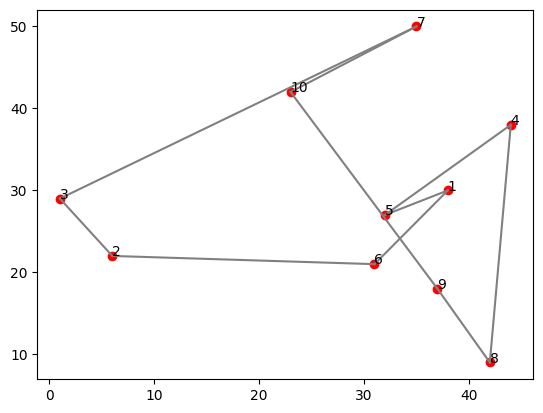

In [88]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np


# Function to get cities information from a file
def get_city():
    cities = []
    # Open the file containing city information
    f = open("TSP.txt")
    for i in f.readlines():
        node_city_val = i.split()
        # Append city information to the list
        cities.append(
            [node_city_val[0], float(node_city_val[1]), float(node_city_val[2])]
        )
    return cities


# Function to calculate the travel time based on traffic variations
def calculate_travel_time(cityA, cityB, time):
    base_distance = math.sqrt(
        math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
    )
    # Simulate traffic variation with a sine function (you can adjust the parameters as needed)
    traffic_multiplier = 1 + 0.5 * np.sin(
        time / 24 * 3 * np.pi
    )  
    travel_time = base_distance * traffic_multiplier
    print(f"travel_time between {cityA[0]} & {cityB[0]} : {travel_time}")
    return travel_time


# Function to calculate the total distance of the path
def calculate_total_time(cities):
    total_time = 0
    current_time = 0  # Start time, adjust if necessary
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]
        # Calculate the travel time between two cities considering the time of day
        travel_time = calculate_travel_time(cityA, cityB, current_time)
        total_time += travel_time
        current_time += travel_time

    # Calculate the time to return to the starting city
    cityA = cities[0]
    cityB = cities[-1]
    travel_time = calculate_travel_time(cityB, cityA, current_time)
    total_time += travel_time
    print("-----------------------------------")
    print(f"total_time {total_time}")
    print("-----------------------------------")
    return total_time


# Function to create the initial population
def select_population(cities, size):
    population = []
    for i in range(size):
        c = cities.copy()
        # Shuffle cities to create a random path
        random.shuffle(c)
        total_time = calculate_total_time(c)
        # Append the path and its total time to the population
        population.append([total_time, c])
    fittest = sorted(population)[0]
    print()
    return population, fittest


# Function to perform the genetic algorithm
def genetic_algorithm(
    population,
    lenCities,
    GENERATIONS_NUMBER,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
):
    gen_number = 0
    for i in range(GENERATIONS_NUMBER):
        new_population = []
        # Selecting the two best options (elitism)
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])
        for i in range(int((len(population) - 2) / 2)):
            # Perform crossover based on the crossover rate
            random_number = random.random()
            if random_number < CROSSOVER_RATE:
                parent_chromosome1 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]
                parent_chromosome2 = sorted(
                    random.choices(population, k=TOURNAMENT_SELECTION_SIZE)
                )[0]
                point = random.randint(0, lenCities - 1)
                # Create child chromosomes by combining parts of parent chromosomes
                child_chromosome1 = parent_chromosome1[1][0:point]
                for j in parent_chromosome2[1]:
                    if j not in child_chromosome1:
                        child_chromosome1.append(j)
                child_chromosome2 = parent_chromosome2[1][0:point]
                for j in parent_chromosome1[1]:
                    if j not in child_chromosome2:
                        child_chromosome2.append(j)
            else:
                child_chromosome1 = random.choices(population)[0][1]
                child_chromosome2 = random.choices(population)[0][1]
            # Perform mutation based on the mutation rate
            if random.random() < MUTATION_RATE:
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome1[point1], child_chromosome1[point2] = (
                    child_chromosome1[point2],
                    child_chromosome1[point1],
                )
                point1 = random.randint(0, lenCities - 1)
                point2 = random.randint(0, lenCities - 1)
                child_chromosome2[point1], child_chromosome2[point2] = (
                    child_chromosome2[point2],
                    child_chromosome2[point1],
                )
            # Add new children to the population
            new_population.append(
                [calculate_total_time(child_chromosome1), child_chromosome1]
            )
            new_population.append(
                [calculate_total_time(child_chromosome2), child_chromosome2]
            )
        population = new_population
        gen_number += 1
        print(f"Population gen {gen_number} : ", population)
        # Print the best distance every 10 generations
        if gen_number % 10 == 0:
            print(gen_number, sorted(population)[0][0])
    answer = sorted(population)[0]
    print("Answer : ", answer)
    return answer


# Function to draw the cities and the best path found
def drawMap(city, answer):
    for j in city:
        # Plot each city
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))
    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]
            # Draw the path between cities
            plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
        except:
            continue
    # Draw the path back to the start to complete the loop
    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
    plt.show()


def main():
    GENERATIONS_NUMBER = 10
    POPULATION_SIZE = 10
    TOURNAMENT_SELECTION_SIZE = 2
    MUTATION_RATE = 0.10
    CROSSOVER_RATE = 0.80
    cities = get_city()
    # Select the initial population and the fittest individual
    firstPopulation, firstFittest = select_population(cities, POPULATION_SIZE)
    answer = genetic_algorithm(
        firstPopulation,
        len(cities),
        GENERATIONS_NUMBER,
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
    )
    print("\n----------------------------------------------------------------")
    print("Initial generation performance : " + str(firstFittest[0]))
    print("Best generation result : " + str(answer[0]))
    print("----------------------------------------------------------------\n")
    drawMap(cities, answer)


main()